# computer vision beginners guide

(<matplotlib.image.AxesImage at 0x278c50c9d90>,
 Text(0.5, 1.0, 'coloured opencv'))

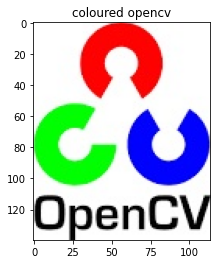

In [1]:
#importing the libraries
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\opencv.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img),plt.title('coloured opencv')

In [2]:
img.shape

(140, 114, 3)

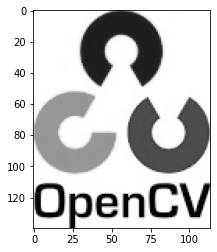

In [3]:
#reding image in gray colour
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap = 'gray')

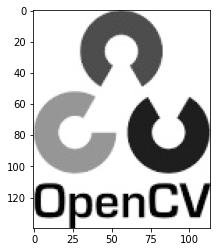

In [4]:
#alternative method for reding image in gray colour
img3 = cv2.imread( r'C:\Users\Abdul Adhil PK\Desktop\opencv.jpg',0)
plt.imshow(img3, cmap="gray")

(217, 200, 3)

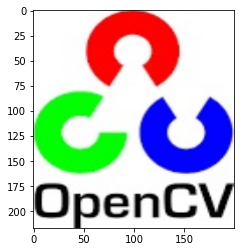

In [5]:
#resizing image from 114x140 to 200x217
img_resize = cv2.resize(img, (200,217))
plt.imshow(img_resize)
img_resize.shape

(70, 57, 3)

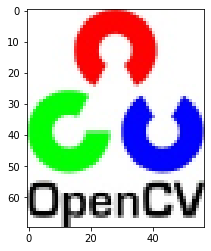

In [6]:
#reducing dimension
img_resize = cv2.resize(img,(0,0),img,0.5,0.5)
plt.imshow(img_resize)
img_resize.shape

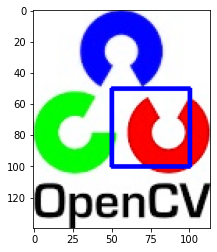

In [7]:
#drawing a rectangle
img_rectangle = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\opencv.jpg')
img_rectangle = cv2.rectangle(img_rectangle, (50,50), (100,100), (0,0,255), 2)
plt.imshow(img_rectangle)

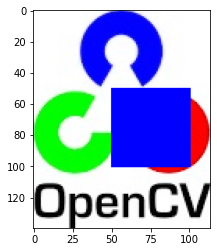

In [8]:
# filling the a rectangle
img_rectangle = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\opencv.jpg')
img_rectangle = cv2.rectangle(img_rectangle, (50,50), (100,100), (0,0,255), -1)
plt.imshow(img_rectangle)

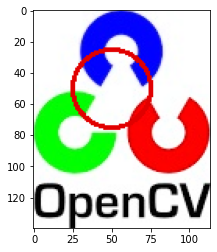

In [9]:
#drawing a circle
img_circle = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\opencv.jpg')
img_circle = cv2.circle(img_circle, (50,50), 25 , (225,0,0), 2)
plt.imshow(img_circle)

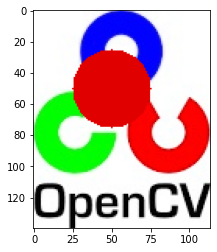

In [10]:
#filling the  a circle
img_circle = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\opencv.jpg')
img_circle = cv2.circle(img_circle, (50,50), 25 , (225,0,0), -1)
plt.imshow(img_circle)

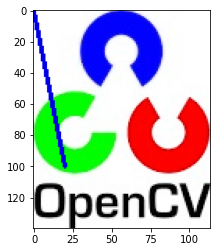

In [11]:
#drawing a line
img_line = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\opencv.jpg')
img_line = cv2.line(img_line, (0,0), (20,100), (0,0,225), 2)
plt.imshow(img_line)

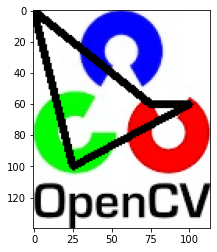

In [12]:
#creating polygons 
import numpy as np
img_polygons = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\opencv.jpg')
points = np.array([[0,0],[25,100],[100,60],[75,60]])
img_polygons = cv2.polylines(img_polygons, [points], True , (0,0,0), 3)
plt.imshow(img_polygons)

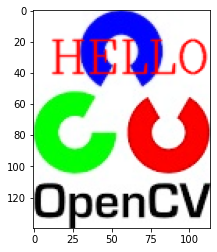

In [13]:
# writing on images
font = cv2.FONT_HERSHEY_COMPLEX
img_text = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\opencv.jpg')
img_text = cv2.putText(img_text,'HELLO ', (10,40), font,1, (255,0,0), 1, cv2.LINE_AA)
plt.imshow(img_text)

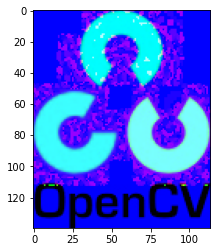

In [14]:
#CONVERTING TO HSV
img_hsv = img_text = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\opencv.jpg')
img_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

(168, 300, 3)


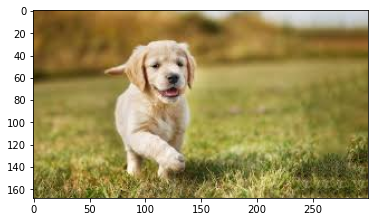

In [15]:
# IMAGE CUT & PASTE

#importing image which will overlap
img_puppy = img_text = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\puppy.jpg')
img_puppy = cv2.cvtColor(img_puppy, cv2.COLOR_BGR2RGB)
plt.imshow(img_puppy)
print(img_puppy.shape)
#importing overlapping image
img_ball = img_text = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\ball.jpg')
img_ball = cv2.cvtColor(img_ball, cv2.COLOR_BGR2RGB)

(104, 154, 3)


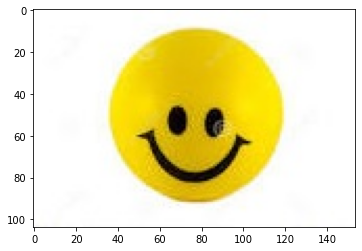

In [16]:
plt.imshow(img_ball)
print(img_ball.shape)

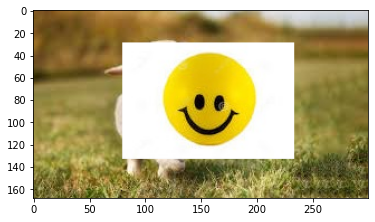

In [17]:
#slicing image of ball into puppy's image

x_offset = 80
y_offset = 29

x_end = x_offset + img_ball.shape[1]
y_end = y_offset + img_ball.shape[0]
img_puppy[y_offset:y_end, x_offset:x_end] = img_ball
plt.imshow(img_puppy)

In [18]:
# masking of images

#importing image which will overlap
img_garden = img_text = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\opencv.jpg')
img_garden = cv2.cvtColor(img_garden, cv2.COLOR_BGR2RGB)
print(img_puppy.shape)

#importing overlapping image

img_ball = img_text = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\ball.jpg',0)
img_ball = cv2.cvtColor(img_ball, cv2.COLOR_BGR2RGB)
print(img_ball.shape)

(168, 300, 3)
(104, 154, 3)


In [19]:
# IMAGE MASKING and cut & paste

x_offset = 80
y_offset = 29

x_end = x_offset + img_ball.shape[1]
y_end = y_offset + img_ball.shape[0]
mask_point = img_puppy[y_offset:y_end, x_offset:x_end]

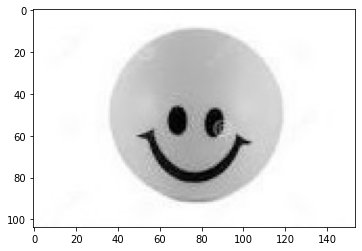

In [20]:
# CREATING MASK
img_ball_gary = cv2.cvtColor(img_ball, cv2.COLOR_RGB2GRAY)
plt.imshow(img_ball, cmap = 'gray')

(104, 154)

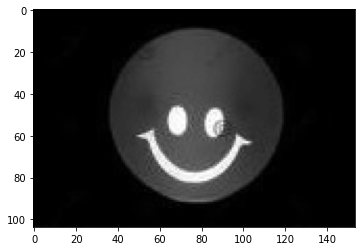

In [21]:
# when placing a mask over an image, the portion below black is not seen and the ones under the white portion is seen through
# HENCE WE NEED TO INVERT THE PREVIOUS IMAGE (bitwise_not used fro the inversion)

mask_1 = cv2.bitwise_not(img_ball_gary)
plt.imshow(mask_1, cmap = 'gray')
mask_1.shape

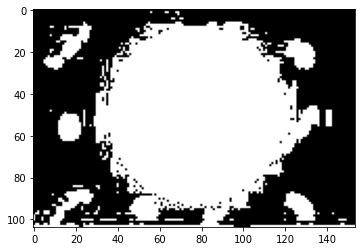

In [22]:
# To add the colour channels to an auxiliary image

bg_channels = np.full(img_ball.shape, 255)
bg_channels.shape

# Applying the mask to all the colour channels in the auxiliary image
# ( bitwise_or = Bit-wise disjunction of input array elements : syntax = Syntax: 
#cv2.bitwise_or(source1, source2, destination, mask))

background = cv2.bitwise_or(bg_channels, bg_channels, mask = mask_1)
background.shape
plt.imshow(background)

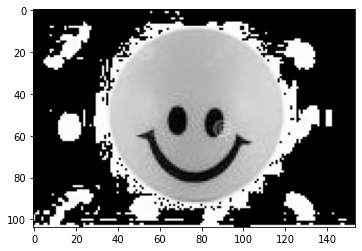

In [23]:
# Placing the auxiliary image, with the mask applied, over the image of the ball

foreground = cv2.bitwise_or(img_ball, img_ball, mask = mask_1)
plt.imshow(foreground)

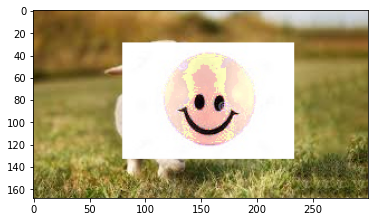

In [24]:
# Combining the above image with the region of interest portion and modifying it
mask_point_final = cv2.bitwise_or(mask_point, foreground)

#use the slicing method, as discussed earlier and add this modified roi image to the base image
x_offset = 80 
y_offset = 29

x_end = x_offset + img_ball.shape[1]
y_end = y_offset + img_ball.shape[0]

img_puppy[y_offset:y_end,x_offset:x_end] = mask_point_final

plt.imshow(img_puppy)

# Image - Thresholding

Thresholding is a very popular segmentation technique, used for separating an object considered as a foreground from its background. In Computer Vision, this technique of thresholding is done on grayscale images. In thresholding, each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255).

There are 2 Main types of Thresholding Techniques

Simple Thresholding

cv2.THRESH_BINARY

cv2.THRESH_BINARY_INV

cv2.THRESH_TRUNC

cv2.THRESH_TOZERO

cv2.THRESH_TOZERO_INV

Adaptive Thresholding

cv2.ADAPTIVE_THRESH_MEAN_C

cv2.ADAPTIVE_THRESH_GAUSSIAN_C

    syntax: cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)

            cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)

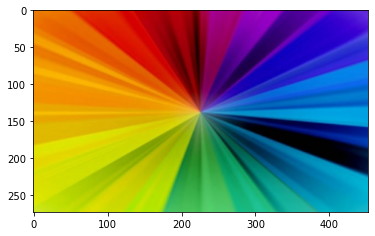

In [25]:
# Image - Thresholding

thresholding = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\colors.jpg')
thresholding = cv2.cvtColor(thresholding, cv2.COLOR_BGR2RGB)
plt.imshow(thresholding)

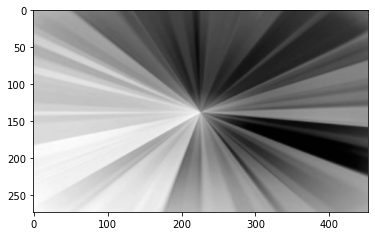

In [26]:
#converting thresholding to GRAY

thresholding = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\colors.jpg')
thresholding = cv2.cvtColor(thresholding, cv2.COLOR_BGR2GRAY)
plt.imshow(thresholding, cmap = 'gray')

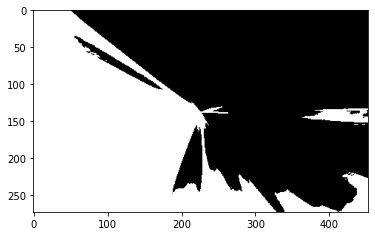

In [27]:
# thresh_binary: converts all values below the threshold value to 0 and above the threshold value to 1

# Here ret is the thresholding value, and thresh1 is the thresholded output

ret, thresh1 = cv2.threshold(thresholding, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap = 'gray')


# Blurring & smoothening

TYOES OF BLURRING :

i. Averaging

      syntax: cv2.blur(src, dst, ksize, anchor, borderType)
ii. Gaussian Blurring

      syntax: cv2.GaussianBlur(src, dst, ksize, sigmaX)
iii. Median Blur

      syntax: medianBlur(src, dst, ksize)
iv. Bilateral Blur

      syntax: cv2.bilateralFilter(src, dst, d, sigmaColor, sigmaSpace, borderType)

(<matplotlib.image.AxesImage at 0x278c53b6730>,
 Text(0.5, 1.0, 'ORIGINAL IMAGE'))

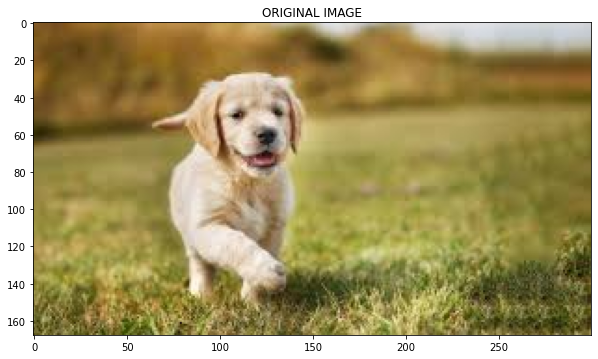

In [28]:
#reading the image
blurring_trials = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\puppy.jpg')
blurring_trials = cv2.cvtColor(blurring_trials, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(blurring_trials),plt.title('ORIGINAL IMAGE')

(<matplotlib.image.AxesImage at 0x278c553e1f0>,
 Text(0.5, 1.0, 'AVERAGE BLURRING'))

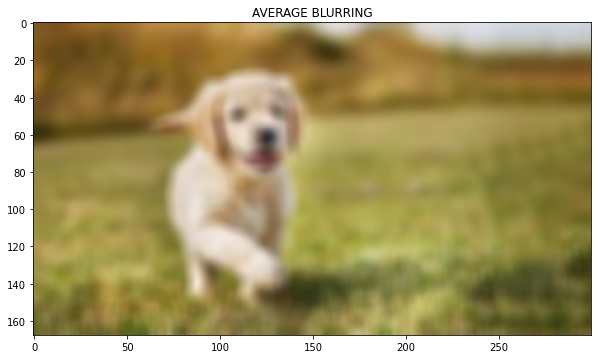

In [29]:
#averaging
averaging = cv2.blur(blurring_trials,(7,7))
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(averaging),plt.title('AVERAGE BLURRING')

(<matplotlib.image.AxesImage at 0x278c525fa30>,
 Text(0.5, 1.0, 'GAUSSIAN BLURRING'))

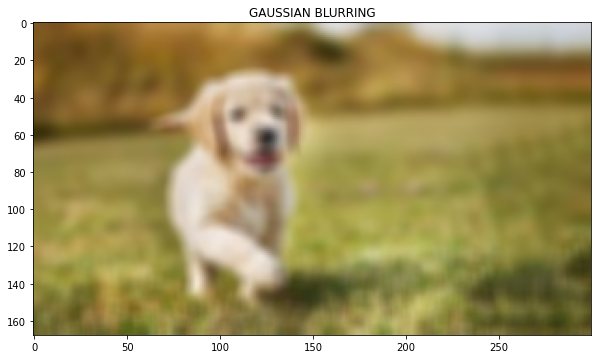

In [32]:
#gaussian blur
blurring_trials = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\puppy.jpg')
blurring_trials = cv2.cvtColor(blurring_trials, cv2.COLOR_BGR2RGB)
gaussian = cv2.GaussianBlur(blurring_trials,(7,7),10)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(gaussian),plt.title('GAUSSIAN BLURRING')

(<matplotlib.image.AxesImage at 0x278c550a0d0>,
 Text(0.5, 1.0, 'MEDIAN BLURRING'))

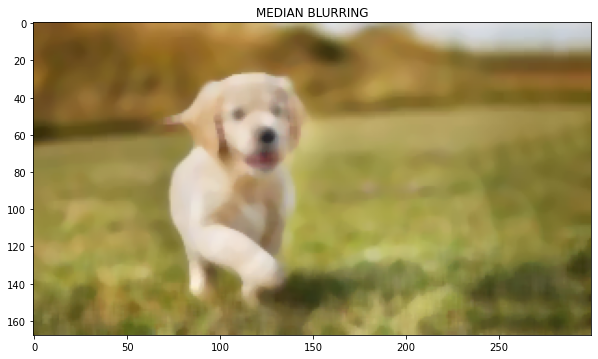

In [33]:
#median blur
blurring_trials = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\puppy.jpg')
blurring_trials = cv2.cvtColor(blurring_trials, cv2.COLOR_BGR2RGB)
median = cv2.medianBlur(blurring_trials,7)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(median),plt.title('MEDIAN BLURRING')

(<matplotlib.image.AxesImage at 0x278c68d3cd0>,
 Text(0.5, 1.0, 'BILATERAL BLURRING'))

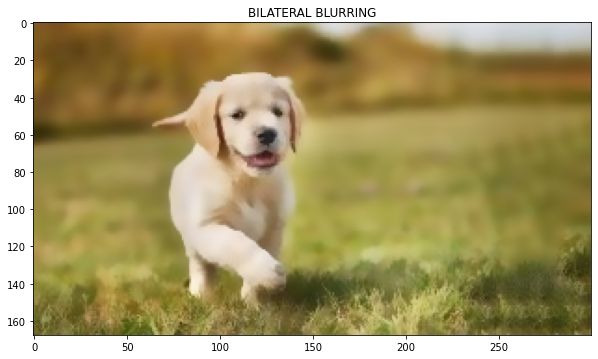

In [34]:
#bilateral blur
blurring_trials = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\puppy.jpg')
blurring_trials = cv2.cvtColor(blurring_trials, cv2.COLOR_BGR2RGB)
bilateral = cv2.bilateralFilter(blurring_trials,9,75,75)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(bilateral),plt.title('BILATERAL BLURRING')

# Erosion and Dilation

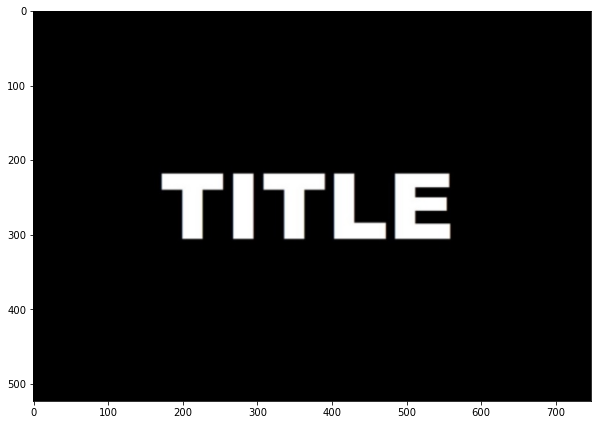

In [48]:
#reading the image
morph = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\text.jpg')
morph = cv2.cvtColor(morph, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(morph)

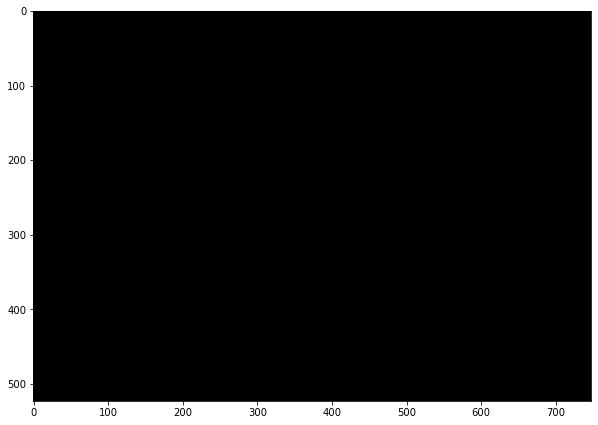

In [49]:
#erosion

morph = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\text.jpg')
morph = cv2.cvtColor(morph, cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5))
erode_morph = cv2.erode(morph, kernel, iterations = 8)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(erode_morph)

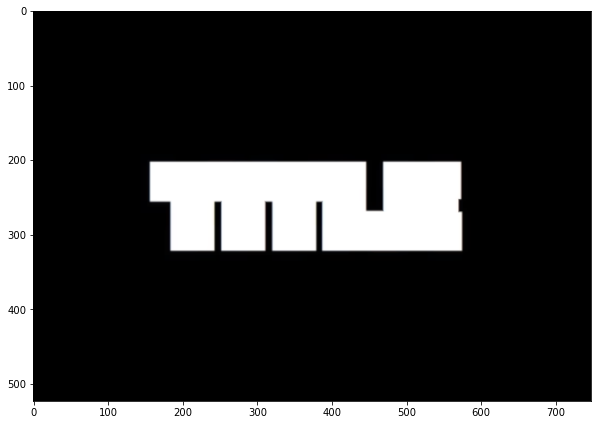

In [50]:
#dilation
morph = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\text.jpg')
morph = cv2.cvtColor(morph, cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5))
dilate_morph = cv2.dilate(morph, kernel, iterations = 8)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(dilate_morph)

# . Edge Detection

Edge detection is an image processing technique for finding the boundaries of objects within images. It mainly works by detecting discontinuities in brightness. Various methods can be adopted for edge detection, namely:

Morphological Gradient edge detection - It is a combination of the erosion and dilation techniques. This function takes the difference between the eroded and dilated images

1. syntax: cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])
Sobel edge detection - It is a gradient based method based on the first order derivatives. It calculates the first derivatives of the image separately for the X and Y axes. The operator uses two 3X3 kernels, one for x direction and the other for y direction.

2. syntax: cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])
Laplacian edge detection - It is also a gradient based method, similar to Sobel. But, it uses only one kernel. It calculates second order derivatives in a single pass.

3. syntax: cv2.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]])
Canny edge detection - This uses a multi-stage algorithm to detect a wide range of edges in images. It combines Gaussian algorithm, Sobel filters and many other detailed stages.

4. syntax: cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])

(<matplotlib.image.AxesImage at 0x278c8e4adc0>,
 Text(0.5, 1.0, 'ORIGINAL IMAGE'))

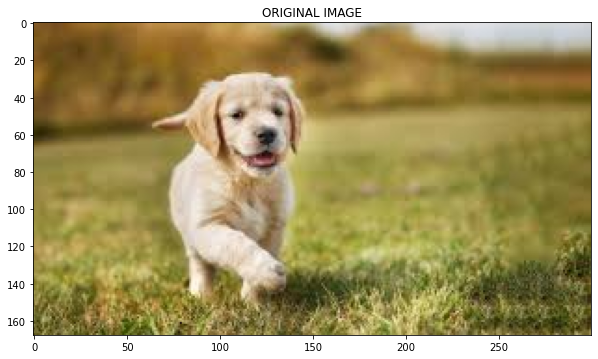

In [52]:
#reading the original image
edge_det = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\puppy.jpg')
edge_det = cv2.cvtColor(edge_det, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(edge_det),plt.title('ORIGINAL IMAGE')

(<matplotlib.image.AxesImage at 0x278c911a160>,
 Text(0.5, 1.0, 'MORPHOLOGICAL GRADIENT EDGE DETECTION'))

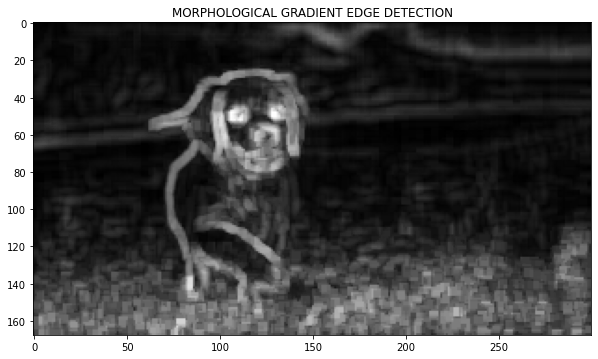

In [53]:
# morphological gradient
edge_det = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\puppy.jpg')
edge_det = cv2.cvtColor(edge_det, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5))
morph_grad = cv2.morphologyEx(edge_det,cv2.MORPH_GRADIENT,kernel)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(morph_grad, cmap = 'gray'),plt.title('MORPHOLOGICAL GRADIENT EDGE DETECTION')

(<matplotlib.image.AxesImage at 0x278c9170130>,
 Text(0.5, 1.0, 'SOBEL-X EDGE DETECTION'))

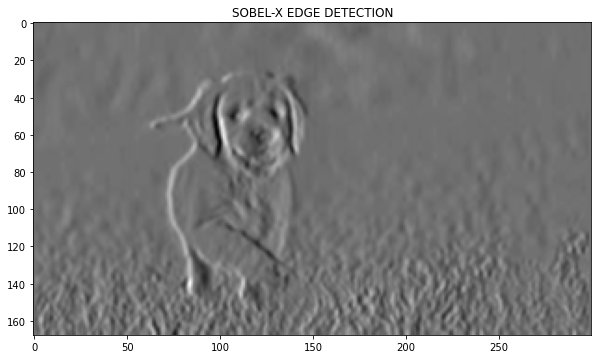

In [54]:
#Sobel-X Edge Detection
edge_det = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\puppy.jpg')
edge_det = cv2.cvtColor(edge_det, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(edge_det, cv2.CV_64F,1,0,ksize = 5)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(sobelx, cmap = 'gray'),plt.title('SOBEL-X EDGE DETECTION')

(<matplotlib.image.AxesImage at 0x278c91b95b0>,
 Text(0.5, 1.0, 'SOBEL-Y EDGE DETECTION'))

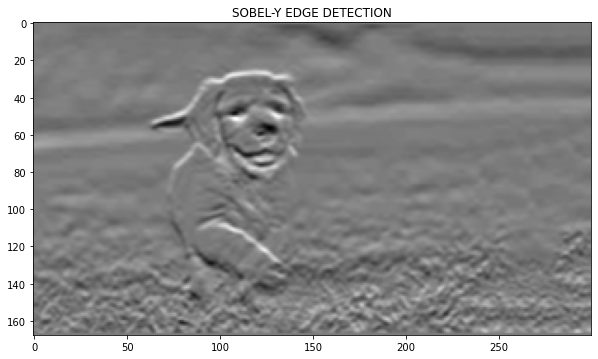

In [55]:
#Sobel-Y Edge Detection
edge_det = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\puppy.jpg')
edge_det = cv2.cvtColor(edge_det, cv2.COLOR_BGR2GRAY)
sobely = cv2.Sobel(edge_det, cv2.CV_64F,0,1,ksize = 5)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(sobely, cmap = 'gray'),plt.title('SOBEL-Y EDGE DETECTION')

(<matplotlib.image.AxesImage at 0x278c9482520>,
 Text(0.5, 1.0, 'SOBEL EDGE DETECTION - Thresholded'))

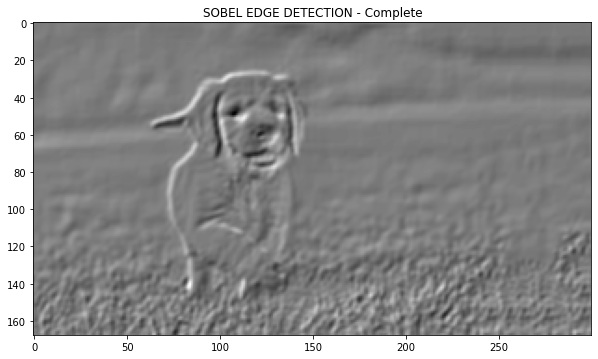

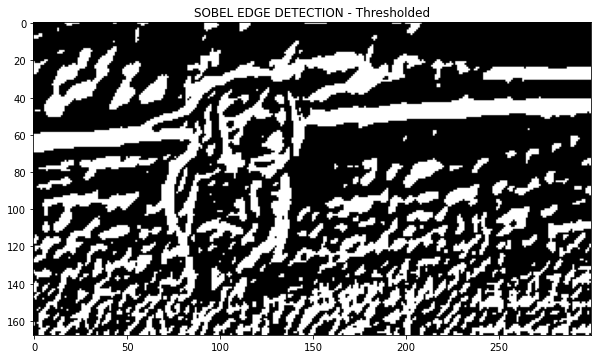

In [59]:
#use alpha blending and thresholding to get the combined effect of x sobel and y sobel
# syntax : addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]])
blended = cv2.addWeighted(src1 = sobelx, alpha = 0.5, src2 = sobely, beta = 0.5, gamma = 0)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(blended, cmap = 'gray'),plt.title('SOBEL EDGE DETECTION - Complete')


#threshold the above image to get a clear picture of the edges
ret, blended_thresh = cv2.threshold(blended, 120, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(blended_thresh, cmap = 'gray'),plt.title('SOBEL EDGE DETECTION - Thresholded')

(<matplotlib.image.AxesImage at 0x278c9a95640>,
 Text(0.5, 1.0, 'CANNY EDGE DETECTION'))

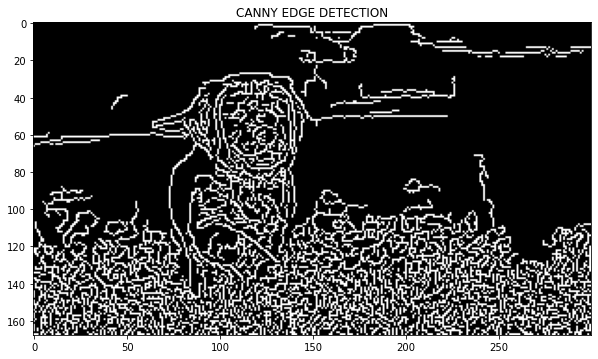

In [60]:
edge_det = cv2.imread(r'C:\Users\Abdul Adhil PK\Desktop\puppy.jpg')
edge_det = cv2.cvtColor(edge_det, cv2.COLOR_BGR2GRAY)
canny_det = cv2.Canny(edge_det, threshold1= 30, threshold2=100)

fig = plt.figure(figsize=(10,10))
aux = fig.add_subplot(111)
aux.imshow(canny_det, cmap = 'gray'),plt.title('CANNY EDGE DETECTION')

# Thank You